In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import log_loss
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
from mpl_toolkits.mplot3d import Axes3D

random_state = 10 # Ensure reproducible results
%matplotlib inline

In [3]:
#------------DATA and TRAIN VALIDATION TEST SPLIT-----------------
#--- load data
ing_mat = loadmat('MATLAB/ingredients.mat')['ingredients']
cityDist_mat = loadmat('MATLAB/citiesDistMat.mat')['citiesDistMat']
labelName_mat = loadmat('MATLAB/labelNames.mat')['labelNames']
labels_mat = loadmat('MATLAB/labels.mat')['labels']
recipe_mat = loadmat('MATLAB/recipes.mat')['recipes']

#--- for colnames
ing_headline = []
for i in ing_mat[0]:
    ing_headline.append(i[0])

#--- create data matrices
dataset_X = pd.DataFrame(recipe_mat,columns=ing_headline) #predictors
dataset_y = pd.DataFrame(labels_mat,columns=['label']) #labels
X_train_full,X_test,y_train_full,y_test = train_test_split(dataset_X,dataset_y,test_size=0.2, random_state=10) #train test split
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size=0.25, random_state=10) #train val split
X_train_len = len(X_train)


In [4]:
dataset_y = dataset_y.squeeze()
y_train = y_train.squeeze()

In [5]:
#--- additionally have cuisines as list
cuisines = []
for n in range(0, 12, 1):
    idx = dataset_y.index[dataset_y.values == n+1]
    cuisines.append(labelName_mat[idx[0]][0].item())

# Exploratory Data Analysis

## Plots

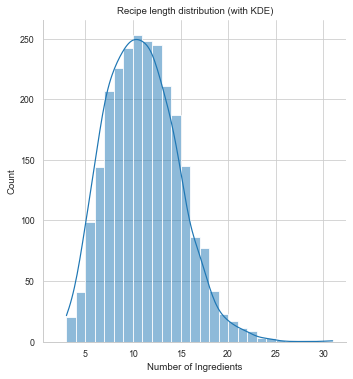

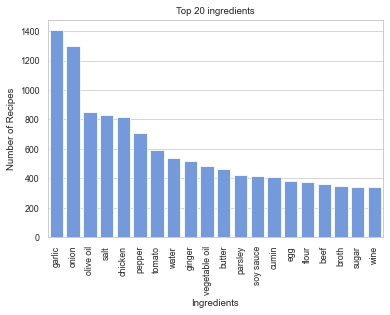

In [6]:
#------------EXPLORATORY DATA ANALYSIS-----------------

## Diagrams
## -- Plot number of ingredients
sns.set_context('paper')
sns.set_style("whitegrid")
ax = sns.displot(np.sum(X_train,axis=1), bins=np.linspace(1,29,29)+1,kde=True)
ax.set(xlabel="Number of Ingredients", title="Recipe length distribution (with KDE)")
# ax.savefig("./Figures/Recipe_length.png", dpi=500) ## Save the figure produced

##--- top 20 most used ingredients
fig, ax = plt.subplots()
# sum up occurences of each ingredient and
# filter for the 20 most frequent
most_freq_ing = X_train.sum().nlargest(20)
ax = sns.barplot(x=most_freq_ing.index, y=most_freq_ing.values, color='cornflowerblue')
ax.set(xlabel="Ingredients", ylabel="Number of Recipes", title="Top 20 ingredients")
xticks = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# ax.figure.savefig("./Figures/Top_20.png", dpi=500,bbox_inches='tight') ## Save the figure produced

<AxesSubplot:>

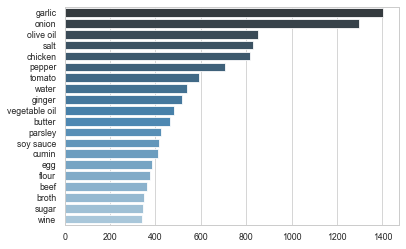

In [7]:
## 2nd Version of barplot, with vertical orientation
cc = sns.color_palette("Blues_d", 20)
sns.barplot(y=most_freq_ing.index,x=most_freq_ing.values, palette=reversed(cc))

In [8]:
## --- Metrics for the recipe length distribution
from scipy.stats import kurtosis, skew
print("recipe length median {}".format(np.sum(X_train,axis=1).median()))
print("recipe length mean {}".format(np.sum(X_train,axis=1).mean()))
print("recipe length max {}".format(np.sum(X_train,axis=1).max()))
print("recipe length min {}".format(np.sum(X_train,axis=1).min()))
print("recipe length Kurtosis {}".format(kurtosis(np.sum(X_train,axis=1))))
print("recipe length skewness {}".format(skew(np.sum(X_train,axis=1))))

recipe length median 11.0
recipe length mean 10.860291223927588
recipe length max 31
recipe length min 3
recipe length Kurtosis 0.2173743971108335
recipe length skewness 0.4306740161111416


## Tables

### Number of ingredients per cuisine

In [9]:
## Tables
## number changes due to the randomness of the split...
used_ing = []
for n in range(0, 12, 1):
    idx = y_train.index[y_train.values == n+1] # find number of recipes per label // due to .squeeze() changed from .label to .values
    freq_ing_cuis = X_train.loc[idx].sum() # find ingredients in the recipes per label
    used_idx = freq_ing_cuis.index[freq_ing_cuis != 0] 
    used_ing.append(len(used_idx)) # append total ingredients

data_ing = pd.DataFrame(data = {"Cuisine": cuisines, 
                    "#Ingredients Used": used_ing})

data_ing.sort_values(by="#Ingredients Used", ascending=False)

## might be better to use original dataset as follows:

# used_ing = []
# for n in range(0, 12, 1):
#     idx = dataset_y.index[dataset_y.values == n+1] // due to .squeeze() changed from .label to .values
#     freq_ing_cuis = dataset_X.iloc[idx].sum()
#     used_idx = freq_ing_cuis.index[freq_ing_cuis != 0]
#     used_ing.append(len(used_idx))

# data_ing = pd.DataFrame(data = {"Cuisine": cuisines, 
#                     "#Used ingredients": used_ing})

# data_ing.sort_values(by="#Used ingredients", ascending=False)

,Cuisine,#Ingredients Used
1,English,270
7,Japanese,244
2,French,243
10,Spanish,235
3,German,221
11,Thai,218
9,Moroccan,210
8,Mexican,207
5,Indian,204
6,Italian,202


In [10]:
#--- Average number of ingredients for each cuisine per recipe
av_num_ing = []
for i in range(0, 12, 1):
    idx = y_train.index[y_train.values == i+1] # // due to .squeeze() changed from .label to .values
    # row-wise sum of ingredients
    sum_ing = X_train.loc[idx].sum(axis=1)
    av_num_ing.append(sum_ing.mean())

data_av_ing = pd.DataFrame(data = {"Cuisine": cuisines, 
                    "Average no. of ingredients": av_num_ing})

data_av_ing.sort_values(by="Average no. of ingredients", ascending=False)

,Cuisine,Average no. of ingredients
9,Moroccan,13.244019
5,Indian,13.031674
11,Thai,11.564815
10,Spanish,11.383929
0,Chinese,11.290155
4,Greek,10.984925
2,French,10.382353
6,Italian,10.376744
8,Mexican,10.247748
3,German,9.417476


# Dimensionality Reduction

### Functions

The following function `scatter_2d_label()` is used to create a 2D scatter plot that also annotates the corresponding classes appropriately.

In [11]:
def scatter_2d_label(X_2d, y, ax=None, s=10, alpha=0.5, lw=5):
    """Visualise a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    ax : matplotlib axes.Axes 
         axes to plot on
         
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    ## custom color palette so that colors do not repeat
    cc = ['#ebac23','#b80058','#008cf9','#006e00','#00bbad','#d163e6','#b24502','#ff9287','#5954d6','#00c6f8','#878500','#00a76c','#bdbdbd']

    targets = np.unique(y)  # extract unique labels
    colors = sns.color_palette(cc,n_colors=targets.size)
    
    if ax is None:
        fig, ax = plt.subplots()
        
    # scatter plot    
    for color, target in zip(colors, targets):
        sns.scatterplot(x=X_2d[y == target, 0], y=X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw, ax=ax)
        ## original plotting function bellow ↓↓
        # ax.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)
    
    # add legend
    ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False); # Add a legend outside the plot at specified point
    
    return ax

In [12]:
##-----Create Dictionary and y_train labels with strings for plot legends
labelsName = [l[0][0] for l in labelName_mat]
labels_dict = pd.DataFrame(labelsName,columns=['label']) #labels dictionary
label_index = y_train.index
y_train_labels = labels_dict.loc[label_index].squeeze() #labels of training dataset in string format

## PCA

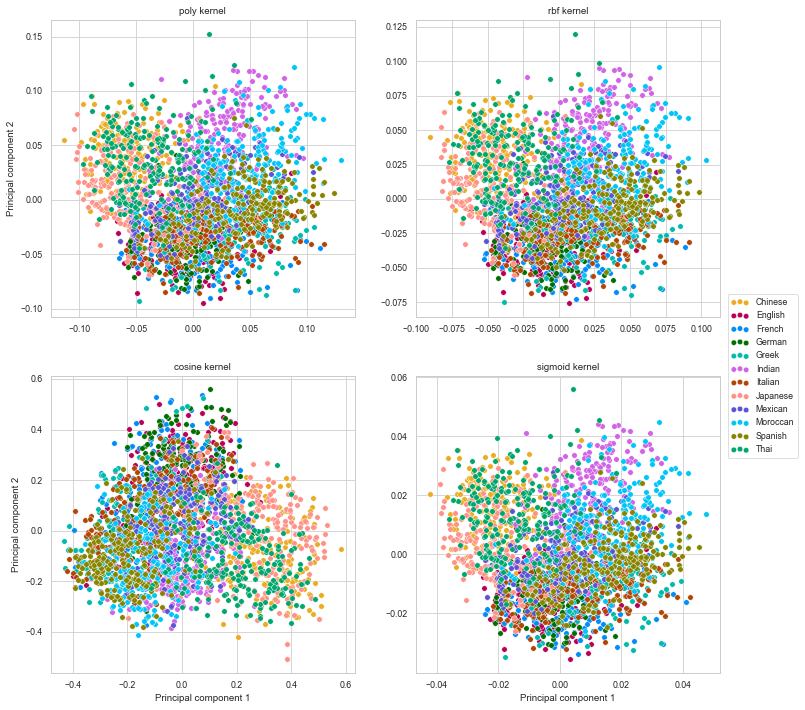

In [13]:
## Kernel PCA

kernels = ['poly', 'rbf', 'cosine', 'sigmoid']
fig, ax = plt.subplots(2,2,figsize=(12,12));

for ii, kernel in enumerate(kernels):
    X_kpca_2d = KernelPCA(n_components=2, kernel=kernel,random_state=10).fit_transform(X_train)
    cur_ax = ax[ii//2, ii%2]
    scatter_2d_label(X_kpca_2d, y_train_labels, ax=cur_ax,alpha=1,s=30)
    cur_ax.set(title='{} kernel'.format(kernel))
    cur_ax.legend().set_visible(False)

ax[0, 0].set_ylabel('Principal component 2')
ax[1, 0].set_ylabel('Principal component 2')

ax[1, 0].set_xlabel('Principal component 1')
ax[1, 1].set_xlabel('Principal component 1')

plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.], scatterpoints=3);
# plt.savefig("./Figures/Kernel_PCA.png", dpi=500) ## Save the figure produced

In [28]:
## Variance Explained
## this takes a while don't rerun if there is no need to
pca_var = []
for i in range(1,X_train.shape[1]-20): # the last 30 variance explained scores are all 1 so I explude them for a bit faster runtime
    pca_t = PCA(n_components=i, random_state=10).fit(X_train)
    pca_var.append(pca_t.explained_variance_ratio_.sum())

[0.054104592806761095, 0.09882612522509535, 0.13480913945676598, 0.16798875043164035, 0.19649899868366136, 0.22181174655985034, 0.244445613343686, 0.2649485079741612, 0.2827951404289718, 0.2994696015757088, 0.3146275404036426, 0.3295186406954574, 0.34373551962137, 0.3574081956425399, 0.370983617931139, 0.38398251729302535, 0.39635106570150935, 0.4082801047866656, 0.4198864170739037, 0.4312336117690482, 0.44250435946822164, 0.4533589311419877, 0.46378550181552397, 0.4737699974316619, 0.48325458603163035, 0.49273169092768243, 0.5017164876686552, 0.5103079426187352, 0.5185956285465687, 0.5268410690181342, 0.5348264097461866, 0.5425750654028962, 0.5503474571822621, 0.5578377275623007, 0.5651749275485765, 0.5723309745267442, 0.5792035526133447, 0.5853418402812545, 0.5916862057851168, 0.5976774306191402, 0.6036052508920128, 0.609259884748635, 0.6148631386284482, 0.6203441906709207, 0.6256851819575523, 0.6309824177417852, 0.6359049315577046, 0.6409336730825319, 0.6459296784940727, 0.650775377

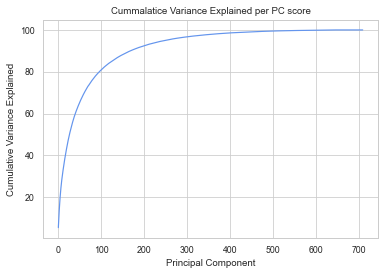

In [62]:
x_ax = np.linspace(1,X_train.shape[1]-1,X_train.shape[1]-1)
vars = {'Cumulative Variance Explained': [i * 100 for i in pca_var],
        'Principal Component': x_ax}
pca_var_df = pd.DataFrame(vars, columns = ['Cumulative Variance Explained', 'Principal Component'])
ax = sns.lineplot(data=pca_var_df, x="Principal Component", y="Cumulative Variance Explained", color='cornflowerblue')
ax.set(title="Cummalatice Variance Explained per PC score")
# ax.figure.savefig("./Figures/PCA_var_explained.png", dpi=500,bbox_inches='tight') ## Save the figure produced

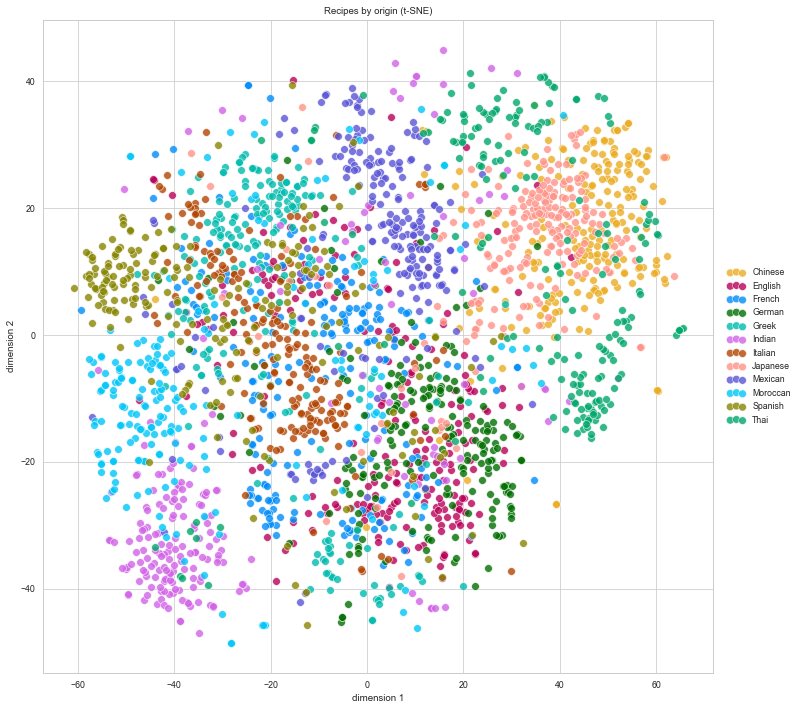

In [26]:
## tSNE
## create low dimensional representasion with TSNE
X_embedded = TSNE(n_components=2,perplexity=30,n_iter=2000,init='pca', random_state=10).fit_transform(X_train)

## ---- Plot the figure
fig, ax = plt.subplots(figsize=(12,12))
scatter_2d_label(X_embedded,y_train_labels,alpha=.8,ax=ax,s=60)
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')
title = ax.set(title='Recipes by origin (t-SNE)')
# ax.figure.savefig("./Figures/PCA_tSNE.png", dpi=500) ## Save the figure produced

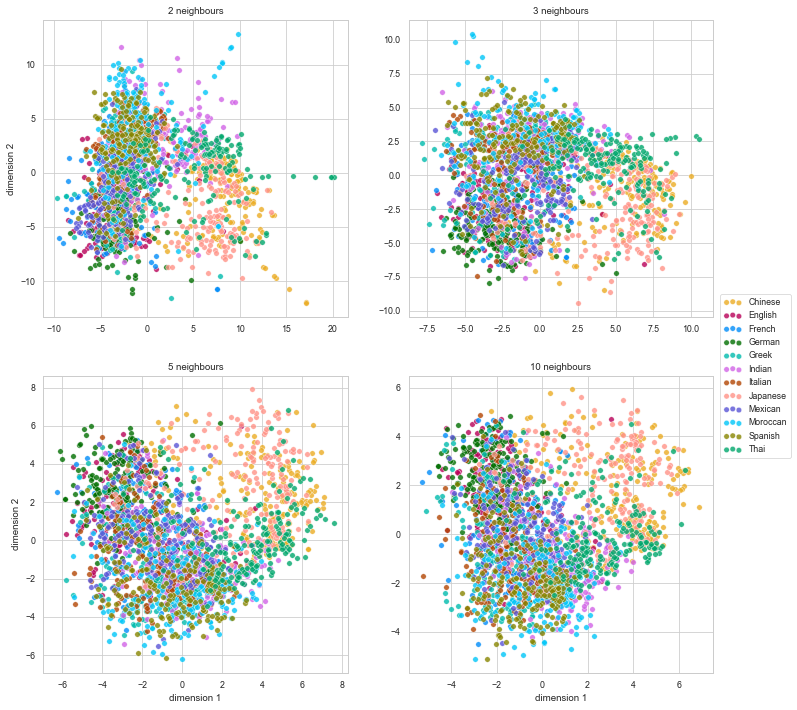

In [36]:
## ISOMAP
n_neighbours_arr = [2, 3, 5, 10]
fig, ax = plt.subplots(2,2,figsize=(12,12))

for ii, n_neighbours in enumerate(n_neighbours_arr):
    ismp = Isomap(n_components=2, n_neighbors=n_neighbours)
    X_ismp_2d = ismp.fit_transform(X_train)
    
    cur_ax = ax[ii//2, ii%2]
    scatter_2d_label(X_ismp_2d, y_train_labels, ax=cur_ax,alpha=.8,s=30)
    cur_ax.set(title='{} neighbours'.format(n_neighbours))
    cur_ax.legend().set_visible(False)
 
ax[0, 0].set_ylabel('dimension 2')
ax[1, 0].set_ylabel('dimension 2')

ax[1, 0].set_xlabel('dimension 1')
ax[1, 1].set_xlabel('dimension 1')

plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.], scatterpoints=3);
# plt.savefig("./Figures/ISOMAP_PCA.png", dpi=500) ## Save the figure produced

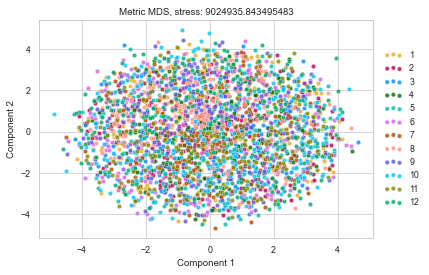

In [37]:
## Metric MDS based on Euclidean distances
mds = MDS(n_components=2, n_jobs=-1, random_state=10, max_iter=100)
X_mds_2d = mds.fit_transform(X_train)

scatter_2d_label(X_mds_2d, y_train,alpha=.8,s=20)
plt.title('Metric MDS, stress: {}'.format(mds.stress_))
plt.xlabel('Component 1')
plt.ylabel('Component 2');
# plt.savefig("./Figures/Metric_MDS_euclid dist.png", dpi=500,bbox_inches='tight') ## Save the figure produced

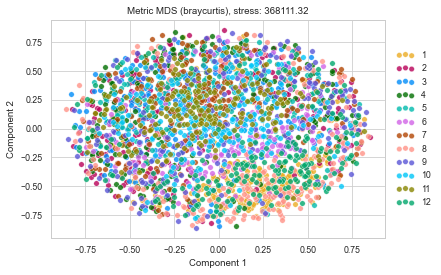

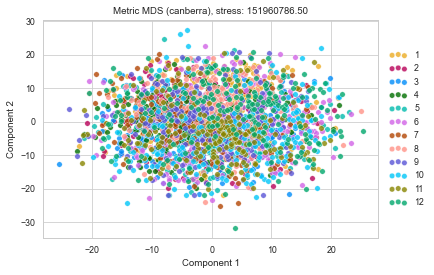

In [35]:
## Metric MDS based on custom distances
my_metrics = ['braycurtis', 'canberra']
for metric in my_metrics:
    delta = pairwise_distances(X=X_train, metric=metric)
    mds = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1, max_iter=100)
    X_mds_2d = mds.fit_transform(delta)
    scatter_2d_label(X_mds_2d, y_train,alpha=.8,s=30)
    plt.title('Metric MDS ({0}), stress: {1:.2f}'.format(metric, mds.stress_))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2');
    ## Save the figure produced
#     plt.savefig("./Figures/Metric_MDS_{}.png".format(metric), dpi=500,bbox_inches='tight') 
    


In [ ]:
## UMAP


In [ ]:
#------------MODELS-----------------------------------

## Logistic Regression


## Naive Bayes


## Logistic Regression DR


## Naive Bayes DR


## Other 1


## Other 2


## Other 3

In [ ]:
#------------VALIDATION-------------------------------

## BEST MODEL Hyperparameter tuning

## Final Model



In [ ]:
#------------TEST SET PREDICTIONS---------------------

## Accuracy scores

## MISC

